# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

### Шаг 1. Откройте файл с данными и изучите общую информацию. 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('/datasets/real_estate_data.csv')

In [3]:
df.head()

,total_images\tlast_price\ttotal_area\tfirst_day_exposition\trooms\tceiling_height\tfloors_total\tliving_area\tfloor\tis_apartment\tstudio\topen_plan\tkitchen_area\tbalcony\tlocality_name\tairports_nearest\tcityCenters_nearest\tparks_around3000\tparks_nearest\tponds_around3000\tponds_nearest\tdays_exposition
0,20\t13000000.0\t108.0\t2019-03-07T00:00:00\t3\...
1,7\t3350000.0\t40.4\t2018-12-04T00:00:00\t1\t\t...
2,10\t5196000.0\t56.0\t2015-08-20T00:00:00\t2\t\...
3,0\t64900000.0\t159.0\t2015-07-24T00:00:00\t3\t...
4,2\t10000000.0\t100.0\t2018-06-19T00:00:00\t2\t...


Данные в таблице склеились в одну строку. Разделим их.

In [4]:
df = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')

Выведем на экран первые 10 строк таблицы.

In [5]:
df.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


Сразу замечаем отсутствующие значения и нецелые числа в непредназначенных столбцах. Как будто в доме может быть нецелое количество этажей. Посмотрим описание данных.

In [6]:
df.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,14504.000000,23613.000000,21796.000000,23699.000000,21421.000000,12180.000000,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,20518.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.771499,10.673824,34.457852,5.892358,10.569807,1.150082,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.980900,180.888634
std,5.682529,1.088701e+07,35.654083,1.078405,1.261056,6.597173,22.030445,4.885249,5.905438,1.071300,12630.880622,8608.386210,0.802074,342.317995,0.938346,277.720643,219.727988
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.520000,5.000000,18.600000,2.000000,7.000000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,1.000000,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,2.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


Замечаем аномалии в стобцах 'rooms' и 'ceiling_height': 19 комнат и 100 метровые потолки. Также в некоторых колонках используются нецелые числа.
Посмотрим на количество пропусков.

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null object
rooms                   23699 non-null int64
ceiling_height          14504 non-null float64
floors_total            23613 non-null float64
living_area             21796 non-null float64
floor                   23699 non-null int64
is_apartment            2775 non-null object
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            21421 non-null float64
balcony                 12180 non-null float64
locality_name           23650 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     18180 non-null float64
parks_around3000        18181 non-null float64
parks_nearest           8079 non-null float64
ponds_around300

Пропуски присутствуют в следующих колонках:
- ceiling_height
- floors_total
- living_area
- is_apartment
- kitchen_area
- balcony
- locality_name
- airports_nearest
- cityCenters_nearest
- parks_around3000
- parks_nearest
- ponds_around3000
- ponds_nearest
- days_exposition

Определим количество пропусков в процентах.

In [8]:
percent_missing = df.isnull().sum() * 100 / len(df)
missing_value_df = pd.DataFrame({'column_name': df.columns,
                                 'percent_missing': percent_missing})
missing_value_df

,column_name,percent_missing
total_images,total_images,0.000000
last_price,last_price,0.000000
total_area,total_area,0.000000
first_day_exposition,first_day_exposition,0.000000
rooms,rooms,0.000000
ceiling_height,ceiling_height,38.799105
floors_total,floors_total,0.362885
living_area,living_area,8.029875
floor,floor,0.000000
is_apartment,is_apartment,88.290645


In [9]:
print('Процент пропусков по всей таблице:', missing_value_df['percent_missing'].mean())

Процент пропусков по всей таблице: 19.456325353198643


Пропусков очень много: почти 20% по отношению ко всей таблице. А в колонках 'ceiling_height', 'balcony',  'is_apartment', 'parks_nearest' и 'ponds_nearest' количество пропусков превышает 30%.

### Вывод

В данных присутствует пропуски: в 5 колонках их количество превышает 30 процентов. Также в некоторых колонках данные необходимо перевести в целочисленных тип.

### Шаг 2. Предобработка данных

<font color=#008000>2.1 Определение и заполнение пропущенных значений</font>

Изучив таблицу мы обнаружили пропруски в 14ти колонках.

Возможные причины появления пропусков:
- ceiling_height - пользователь не смог измерить высоту потолка, или не посчитал необходимым внести эту информацию в объявление.
- floors_total - пользователь мог не заполнить эти данные из за необязательности заполнения.
- living_area/kitchen_area - пользователь мог не заполнить эти данные из за необязательности заполнения. Также возможет вариант, что пропуски есть только в объявлениях по квартирам-студиям, где сложно определить площадь жилой зоны/кухонной зоны.
- is_apartment - пользователь не заполнить этот пункт, т.к. не знал ,что такое 'апартаменты'.
- balcony - скорее всего, пропуски есть только в объявлениях квартир без балконов.
- locality_name - пользователь мог пропустить этот пункт, т.к. он выкладывал объявление в разделе 'Санкт-Петербург', и заполнять раздел 'населённый пункт' посчитал необязательным.
- parks_around3000, parks_nearest, ponds_around3000, ponds_nearest - эти данные собирались автоматически. Скорее всего они просто не выгрузились.
- airports_nearest, cityCenters_nearest - эти данные собирались автоматически. Возможно система не смогла определить расстояние до аэропорта/центра. Также возможно произошла ошибка привыгрузке данных.
- days_exposition - скорее всего пропуски возникли из-за ошибки выгрузки данных.

Начнём заполнение с колонки <font color=#0000FF>'is_apartment'</font>. Посчитаем количество пропусков и количество значений в этой колонке.

In [10]:
df['is_apartment'].isnull().sum()

20924

In [11]:
df['is_apartment'].value_counts()

False    2725
True       50
Name: is_apartment, dtype: int64

В колонке 'is_apartment' присутствуют 50 апартаментов, 2725 обычных квартир, и 20924 пропуска. Мы могли бы заполнить все пропуски значением False, но тогда у нас поличится всего 50 апартаментов на 22000 объявлений, что не похоже на действительность. Оставляем пропуски на месте.

Теперь <font color=#0000FF>'balcony'</font>. Заполним все пропущенные значения нулями.

In [12]:
df['balcony'] = df['balcony'].fillna(0)

Проверим количество пропусков в 'balcony'.

In [13]:
df['balcony'].isnull().sum()

0

Теперь <font color=#0000FF>'airports_nearest'</font> и  <font color=#0000FF>'cityCenters_nearest'</font>. Посчитаем количество пропусков.

In [14]:
df['airports_nearest'].isnull().sum()

5542

In [15]:
df['cityCenters_nearest'].isnull().sum()

5519

Для решения этой задачи мы будем использовать Яндекс.Геокодер.

Шаг первый - создаём список городов, по которым у нас нет данных в колонках 'airports_nearest' и  'cityCenters_nearest'.

In [16]:
list_of_cities_NaN_airport_center = df.query('airports_nearest != airports_nearest and cityCenters_nearest != cityCenters_nearest')['locality_name'].unique()

Далее испортируем модуль requests, позволяющий нам работать с внешними ссылками.

In [17]:
import requests as r

И создаём переменную с полученной нами из Yandex.Геокода ссылкой, и пустой список, в который будем записывать координаты.

In [1]:
url = 'https://geocode-maps.yandex.ru/1.x/?format=████████████████████████████████'
coordinates = []

Теперь создаём цикл для заполнения пустого списка.

In [19]:
for city in list_of_cities_NaN_airport_center:
    if city == city: # чтоб не столкнуться с nan
        url_formatted = url + 'Ленинградская область ' + city
        response = r.get(url_formatted).json()
        data = response['response']['GeoObjectCollection']['featureMember'][0]['GeoObject']['Point'].get('pos')
        coordinate = (float(data.split()[1]), float(data.split()[0]))
        coordinates.append(coordinate)
    else:
        coordinates.append('')

Создаём таблицу cities_with_NaN_airport_center c двумя колонками - 'Город' и 'Координаты'.

In [20]:
cities_with_NaN_airport_center = pd.DataFrame({'Город':list_of_cities_NaN_airport_center, 'Координаты':coordinates})
cities_with_NaN_airport_center.head()

,Город,Координаты
0,городской посёлок Янино-1,"(59.94814, 30.560515)"
1,посёлок Мурино,"(60.051284, 30.438578)"
2,Сертолово,"(60.141613, 30.211879)"
3,деревня Кудрово,"(59.908489, 30.513569)"
4,Коммунар,"(59.621609, 30.393483)"


Проверяем таблицу на пропуски.

In [21]:
cities_with_NaN_airport_center.isnull().sum()

Город         1
Координаты    0
dtype: int64

Удаляем единственный пропуск.

In [22]:
cities_with_NaN_airport_center = cities_with_NaN_airport_center.dropna().reset_index(drop=True)
cities_with_NaN_airport_center.isnull().sum()

Город         0
Координаты    0
dtype: int64

Теперь создаём переменные с координатами центра Санкт-Петербурга и аэропорта Пулково.

In [23]:
centre_coordinates = (59.946216, 30.311475)
airport_coordinates = (59.7998772, 30.2733421)

Теперь нужно добавить в таблицу cities_with_NaN_airport_center две колонки - расстояние до центра города и до аэропорта. Сделаем мы это с помощью модуля <font color=#0000FF>geopy<font>.

In [24]:
!pip install geopy

Please see https://github.com/pypa/pip/issues/5599 for advice on fixing the underlying issue.
To avoid this problem you can invoke Python with '-m pip' instead of running pip directly.
     |████████████████████████████████| 113 kB 1.3 MB/s eta 0:00:01


Теперь вычисляем расстояние между двумя наборами координат, и добавляем их в новые колонки таблицы cities_with_NaN_airport_center - 'cityCenters_nearest' и 'airports_nearest'.

In [25]:
from geopy import distance
cities_with_NaN_airport_center['cityCenters_nearest'] = cities_with_NaN_airport_center['Координаты'].apply( lambda x: distance.distance(x, centre_coordinates).m)
cities_with_NaN_airport_center['airports_nearest'] = cities_with_NaN_airport_center['Координаты'].apply(lambda x: distance.distance(x, airport_coordinates).m)
cities_with_NaN_airport_center.head()

,Город,Координаты,cityCenters_nearest,airports_nearest
0,городской посёлок Янино-1,"(59.94814, 30.560515)",13920.221318,23055.877511
1,посёлок Мурино,"(60.051284, 30.438578)",13686.938457,29494.466883
2,Сертолово,"(60.141613, 30.211879)",22466.111889,38227.822295
3,деревня Кудрово,"(59.908489, 30.513569)",12057.862426,18102.157608
4,Коммунар,"(59.621609, 30.393483)",36456.127015,20980.070039


Теперь нам нужно удалить из этой таблицы Санкт-Петербург, т.к. расстояние для него считать не нужно.

In [26]:
cities_with_NaN_airport_center.query('Город == "Санкт-Петербург"')

,Город,Координаты,cityCenters_nearest,airports_nearest
12,Санкт-Петербург,"(59.939095, 30.315868)",830.491747,15692.149496


In [27]:
cities_with_NaN_airport_center.drop(cities_with_NaN_airport_center.index[12], inplace=True)
cities_with_NaN_airport_center.reset_index(inplace=True, drop=True)
cities_with_NaN_airport_center.head(15)

,Город,Координаты,cityCenters_nearest,airports_nearest
0,городской посёлок Янино-1,"(59.94814, 30.560515)",13920.221318,23055.877511
1,посёлок Мурино,"(60.051284, 30.438578)",13686.938457,29494.466883
2,Сертолово,"(60.141613, 30.211879)",22466.111889,38227.822295
3,деревня Кудрово,"(59.908489, 30.513569)",12057.862426,18102.157608
4,Коммунар,"(59.621609, 30.393483)",36456.127015,20980.070039
5,поселок городского типа Красный Бор,"(59.68097, 30.674664)",35896.807763,26169.499704
6,Гатчина,"(59.568405, 30.122892)",43405.358800,27144.523903
7,поселок Мурино,"(60.051284, 30.438578)",13686.938457,29494.466883
8,деревня Фёдоровское,"(59.663726, 30.531158)",33801.138920,20985.608800
9,Выборг,"(60.710232, 28.749404)",121211.618970,131931.675578


Список городов с расстоянием до центра и аэропорта мы получили. Теперь создадим два словаря: 'Населённый пункт - Расстояние до центра' и ' Населённый пункт - Расстояние до аэропорта'.

In [28]:
cityCenters_nearest_dict = dict(pd.Series(cities_with_NaN_airport_center['cityCenters_nearest'].values, index=cities_with_NaN_airport_center['Город'].values))
airports_nearest_dict = dict(pd.Series(cities_with_NaN_airport_center['airports_nearest'].values, index=cities_with_NaN_airport_center['Город'].values))

Теперь заменяем пропущенные значения в основном DataFrame.

In [29]:
df.loc[df['cityCenters_nearest'].isnull(), 'cityCenters_nearest'] = df['locality_name'].map(cityCenters_nearest_dict)
df.loc[df['airports_nearest'].isnull(), 'airports_nearest'] = df['locality_name'].map(airports_nearest_dict)
df[df['locality_name'] != 'Санкт-Петербург'][['locality_name', 'airports_nearest', 'cityCenters_nearest']].head(10)

,locality_name,airports_nearest,cityCenters_nearest
1,посёлок Шушары,12817.000000,18603.000000
5,городской посёлок Янино-1,23055.877511,13920.221318
6,посёлок Парголово,52996.000000,19143.000000
8,посёлок Мурино,29494.466883,13686.938457
11,Ломоносов,48252.000000,51677.000000
12,Сертолово,38227.822295,22466.111889
13,Петергоф,37868.000000,33058.000000
14,Пушкин,20782.000000,30759.000000
20,посёлок Парголово,53134.000000,19311.000000
22,деревня Кудрово,18102.157608,12057.862426


Проверяем пропуски в колонках 'airports_nearest' и  'cityCenters_nearest'.

In [30]:
df['airports_nearest'].isnull().sum()

93

In [31]:
df['cityCenters_nearest'].isnull().sum()

70

По сравнению с изначальным количеством пропусков, 5542 и 5519, результат очень хороший.

Теперь передём к <font color=#0000FF>'ceiling_height'</font>. Мы планировали определить среднюю высоту потолка квартир в зависимости от расстояния от центра города, и заполнить этимм значениями пропуски. Как хорошо, что мы сначала заполнили пропуски в колонках 'airports_nearest' и  'cityCenters_nearest'.

In [32]:
df['ceiling_height'].isnull().sum()

9195

Категоризируем данные по все объявления в зависимости от удалённости от центра. Создадим 4 группы:
- 0-5км от центра (Центр)
- 5-17км от центра (В пределах города)
- больше 17км от центра (Область)

Напишем функцию.

In [33]:
def fillna_ceiling_height(row):
    if row['cityCenters_nearest'] < 5000:
        return 'Центр'
    elif row['cityCenters_nearest'] < 17000:
        return 'В пределах города'
    elif row['cityCenters_nearest'] >= 17000:
        return 'Область'

In [34]:
df['distance_from_center_category'] = df.apply(fillna_ceiling_height, axis=1)
df[['cityCenters_nearest', 'distance_from_center_category']].head(10)

,cityCenters_nearest,distance_from_center_category
0,16028.000000,В пределах города
1,18603.000000,Область
2,13933.000000,В пределах города
3,6800.000000,В пределах города
4,8098.000000,В пределах города
5,13920.221318,В пределах города
6,19143.000000,Область
7,11634.000000,В пределах города
8,13686.938457,В пределах города
9,15008.000000,В пределах города


Посчитаем среднюю высоту потолка для каждой категории'distance_from_center_category'.

In [35]:
ceiling_height_grouped_mean = df.groupby('distance_from_center_category')['ceiling_height'].mean()

In [36]:
ceiling_height_grouped_mean.to_frame()

,ceiling_height
distance_from_center_category,
В пределах города,2.746729
Область,2.684517
Центр,3.202703


Теперь пишем цикл для заполнения пропусков в 'ceiling_height'.

In [37]:
distance_from_center_category = ['Центр', 'В пределах города', 'Область'] #Изначально я пытался создать список с помощью метода .unique().tolist(), но происходила ошибка.
for element in distance_from_center_category:
    df.loc[df['distance_from_center_category'] == element, 'ceiling_height'] = df.loc[df['distance_from_center_category'] == element, 'ceiling_height'].fillna(ceiling_height_grouped_mean[element])

Проверяем заполнение пропусков.

In [38]:
df.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,distance_from_center_category
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.700000,16.0,51.00,8,NaN,...,0.0,Санкт-Петербург,18863.000000,16028.000000,1.0,482.0,2.0,755.0,NaN,В пределах города
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,2.684517,11.0,18.60,1,NaN,...,2.0,посёлок Шушары,12817.000000,18603.000000,0.0,NaN,0.0,NaN,81.0,Область
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,2.746729,5.0,34.30,4,NaN,...,0.0,Санкт-Петербург,21741.000000,13933.000000,1.0,90.0,2.0,574.0,558.0,В пределах города
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,2.746729,14.0,NaN,9,NaN,...,0.0,Санкт-Петербург,28098.000000,6800.000000,2.0,84.0,3.0,234.0,424.0,В пределах города
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.030000,14.0,32.00,13,NaN,...,0.0,Санкт-Петербург,31856.000000,8098.000000,2.0,112.0,1.0,48.0,121.0,В пределах города
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,2.746729,12.0,14.40,5,NaN,...,0.0,городской посёлок Янино-1,23055.877511,13920.221318,NaN,NaN,NaN,NaN,55.0,В пределах города
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,2.684517,26.0,10.60,6,NaN,...,1.0,посёлок Парголово,52996.000000,19143.000000,0.0,NaN,0.0,NaN,155.0,Область
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,2.746729,24.0,NaN,22,NaN,...,2.0,Санкт-Петербург,23982.000000,11634.000000,0.0,NaN,0.0,NaN,NaN,В пределах города
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,2.746729,27.0,15.43,26,NaN,...,0.0,посёлок Мурино,29494.466883,13686.938457,NaN,NaN,NaN,NaN,189.0,В пределах города
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.500000,9.0,43.60,7,NaN,...,2.0,Санкт-Петербург,50898.000000,15008.000000,0.0,NaN,0.0,NaN,289.0,В пределах города


In [39]:
df['ceiling_height'].isnull().sum()

36

Было 9195 пропусков, стало 36.

Следующая на очереди - <font color=#0000FF>'floors_total'</font>.

In [40]:
df['floors_total'].isnull().sum()

86

Применим тот же метод, что мы использовали для заполнения пропусков в 'ceiling_height'.

In [41]:
floors_total_grouped_median = df.groupby('distance_from_center_category')['floors_total'].median()
floors_total_grouped_median.to_frame()

,floors_total
distance_from_center_category,
В пределах города,11.0
Область,5.0
Центр,5.0


In [42]:
distance_from_center_category = ['Центр', 'В пределах города', 'Область']
for element in distance_from_center_category:
    df.loc[df['distance_from_center_category'] == element, 'floors_total'] = df.loc[df['distance_from_center_category'] == element, 'floors_total'].fillna(floors_total_grouped_median[element])

In [43]:
df['floors_total'].isnull().sum()

1

Было 86 пропусков, остался 1. 

Посмотрим на <font color=#0000FF>'living_area'</font> и <font color=#0000FF>'kitchen_area '</font>.

In [44]:
df['living_area'].isnull().sum()

1903

In [45]:
df['kitchen_area'].isnull().sum()

2278

Возможно, пропуски есть только у объявлений квартир-студий. Проверим.

In [46]:
df.query('studio == True')[['kitchen_area', 'living_area']].isnull().sum()

kitchen_area    149
living_area      10
dtype: int64

Теория не подтвердилась: у объявлений по квартирам-студиям только 149 пропусков в 'kitchen_area', и 10 пропусков в 'living_area'. Не представляю что ещё можно сделать с пропусками в этих колонках, поэтому оставляю их как есть.

Перейдём к <font color=#0000FF>'locality_name'</font>.

In [47]:
df['locality_name'].isnull().sum()

49

Приемлимое количество пропусков. Решаю оставить всё как есть. Посмотрим на <font color=#0000FF>'parks_around3000', 'parks_nearest', 'ponds_around3000' и 'ponds_nearest'</font>.

In [48]:
df['parks_around3000'].isnull().sum()

5518

In [49]:
df['parks_nearest'].isnull().sum()

15620

In [50]:
df['ponds_around3000'].isnull().sum()

5518

In [51]:
df['ponds_nearest'].isnull().sum()

14589

Пропусков очень много. К счастью, данные из этих столбцов нам не понадобятся для решения задач. Оставляем всё как есть.

Остался только <font color=#0000FF>'days_exposition'</font>.

In [52]:
df['days_exposition'].isnull().sum()

3181

К сожалению, определить среднее время продажи квартир с похожими параметрами мы не можем, поэтому оставляем всё как есть.

Теперь, после наших манипуляций, посмотрим на общее количество пропусков в таблице.

In [53]:
percent_missing = df.isnull().sum() * 100 / len(df)
missing_value_df = pd.DataFrame({'column_name': df.columns,
                                 'percent_missing': percent_missing})
missing_value_df

,column_name,percent_missing
total_images,total_images,0.000000
last_price,last_price,0.000000
total_area,total_area,0.000000
first_day_exposition,first_day_exposition,0.000000
rooms,rooms,0.000000
ceiling_height,ceiling_height,0.151905
floors_total,floors_total,0.004220
living_area,living_area,8.029875
floor,floor,0.000000
is_apartment,is_apartment,88.290645


In [54]:
print('Процент пропусков по всей таблице после заполнения:', missing_value_df['percent_missing'].mean())

Процент пропусков по всей таблице после заполнения: 12.814703243761892


Перед предобработкой данных процент пропусков во всей таблице составлял 19.45. Теперь он составляет 12.81%.

<font color=#008000>2.2 Приведение данные к нужным типам</font>

In [55]:
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,distance_from_center_category
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.700000,16.0,51.0,8,NaN,...,0.0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN,В пределах города
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,2.684517,11.0,18.6,1,NaN,...,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0,Область
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,2.746729,5.0,34.3,4,NaN,...,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,В пределах города
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,2.746729,14.0,NaN,9,NaN,...,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0,В пределах города
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.030000,14.0,32.0,13,NaN,...,0.0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,В пределах города


In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 23 columns):
total_images                     23699 non-null int64
last_price                       23699 non-null float64
total_area                       23699 non-null float64
first_day_exposition             23699 non-null object
rooms                            23699 non-null int64
ceiling_height                   23663 non-null float64
floors_total                     23698 non-null float64
living_area                      21796 non-null float64
floor                            23699 non-null int64
is_apartment                     2775 non-null object
studio                           23699 non-null bool
open_plan                        23699 non-null bool
kitchen_area                     21421 non-null float64
balcony                          23699 non-null float64
locality_name                    23650 non-null object
airports_nearest                 23606 non-null float64
cityCenters

Во первых, у нас не получится изменить тип данных колонок, в которых есть пропуски, без перевода этих колонок в тип object (в дальнейшем это может помешать нам в построении графиков). Поэтому нам придётся пропустить колонки 'floors_total', 'airports_nearest', 'cityCenters_nearest', 'parks_around3000', 'parks_nearest', 'ponds_around3000', 'ponds_nearest', 'days_exposition'.

Колонки, которые будут переведены в целочисленный формат int:
- last_price
- balcony

Колонки, которые будут округлены до 1 знака после запятой (мы не можем позволить потерять даже 0.1 квадратного метра квартиры):
- total_area
- ceiling_height
- living_area
- kitchen_area

И колонку 'first_day_exposition' мы переведём в datetime.

Начнём с <font color=#0000FF>''first_day_exposition'</font>

In [57]:
df['first_day_exposition'] = pd.to_datetime(df['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')

Теперь изменим тип данных на int в следующих колонках:
<font color=#0000FF>
- last_price
- balcony
</font>

In [58]:
df['last_price'] = df[df['last_price'].notnull()]['last_price'].astype('int')
df['balcony'] = df[df['balcony'].notnull()]['balcony'].astype('int')

Теперь округлим до одного знака после запятой эти колонки:
<font color=#0000FF>
- total_area
- ceiling_height
- living_area
- kitchen_area
</font>

In [59]:
df['total_area'] = df[df['total_area'].notnull()]['total_area'].round(1)
df['ceiling_height'] = df[df['ceiling_height'].notnull()]['ceiling_height'].round(1)
df['living_area'] = df[df['living_area'].notnull()]['living_area'].round(1)
df['kitchen_area'] = df[df['kitchen_area'].notnull()]['kitchen_area'].round(1)

Смотрим на результат.

In [60]:
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,distance_from_center_category
0,20,13000000,108.0,2019-03-07,3,2.7,16.0,51.0,8,NaN,...,0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN,В пределах города
1,7,3350000,40.4,2018-12-04,1,2.7,11.0,18.6,1,NaN,...,2,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0,Область
2,10,5196000,56.0,2015-08-20,2,2.7,5.0,34.3,4,NaN,...,0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,В пределах города
3,0,64900000,159.0,2015-07-24,3,2.7,14.0,NaN,9,NaN,...,0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0,В пределах города
4,2,10000000,100.0,2018-06-19,2,3.0,14.0,32.0,13,NaN,...,0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,В пределах города


In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 23 columns):
total_images                     23699 non-null int64
last_price                       23699 non-null int64
total_area                       23699 non-null float64
first_day_exposition             23699 non-null datetime64[ns]
rooms                            23699 non-null int64
ceiling_height                   23663 non-null float64
floors_total                     23698 non-null float64
living_area                      21796 non-null float64
floor                            23699 non-null int64
is_apartment                     2775 non-null object
studio                           23699 non-null bool
open_plan                        23699 non-null bool
kitchen_area                     21421 non-null float64
balcony                          23699 non-null int64
locality_name                    23650 non-null object
airports_nearest                 23606 non-null float64
cityCen

Очень хотелось бы изменить тип данных в 'floors_total', 'airports_nearest', 'cityCenters_nearest' и т.д., но способа их изменить без превращения всеё колонки в object я не нашёл.

### Шаг 3. Посчитайте и добавьте в таблицу

Теперь нам нужно посчитать и добавить в таблицу следующие колонки:
- цена квадратного метра
- день недели побликации объявления о продаже
- месяц побликации объявления о продаже
- год побликации объявления о продаже
- этаж квартиры (варианты — первый, последний, другой)
- соотношение жилой и общей площади
- отношение площади кухни к общей

Добавим в таблицу <font color=#0000FF>цену квадратного метра - 'price_m2'</font>

In [62]:
df['price_m2'] = df['last_price'] / df['total_area']

Теперь добавим <font color=#0000FF>день недели публикации объявления - 'day'</font>

In [63]:
df['day'] = df['first_day_exposition'].apply(lambda x: x.isoweekday())

Теперь добавим <font color=#0000FF>месяц побликации объявления - 'month'</font>

In [64]:
df['month'] = df['first_day_exposition'].apply(lambda x: x.month)

Теперь добавим <font color=#0000FF>год побликации объявления - 'year'</font>

In [65]:
df['year'] = df['first_day_exposition'].apply(lambda x: x.year)

Следующие в очереди <font color=#0000FF>этажи - первый, последний, и другой</font>

Воспользуемся методом .where(), но перед этим импортируем модуль numpy

In [66]:
import numpy as np
df['floor_category'] = np.where(df['floor'] == 1, 'Первый', 'Другой')
df['floor_category'] = np.where(df['floor'] == df['floors_total'], 'Последний', df['floor_category'])

Остались две колонки: <font color=#0000FF>соотношение жилой и общей площади - 'livibg_area_ratio' и  отношение площади кухни к общей - 'kitchen_area_ratio'</font>

In [67]:
df['living_area_ratio'] = df['living_area'] / df['total_area']
df['kitchen_area_ratio'] = df['kitchen_area'] / df['total_area']

Смотрим результат.

In [68]:
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_nearest,days_exposition,distance_from_center_category,price_m2,day,month,year,floor_category,living_area_ratio,kitchen_area_ratio
0,20,13000000,108.0,2019-03-07,3,2.7,16.0,51.0,8,NaN,...,755.0,NaN,В пределах города,120370.370370,4,3,2019,Другой,0.472222,0.231481
1,7,3350000,40.4,2018-12-04,1,2.7,11.0,18.6,1,NaN,...,NaN,81.0,Область,82920.792079,2,12,2018,Первый,0.460396,0.272277
2,10,5196000,56.0,2015-08-20,2,2.7,5.0,34.3,4,NaN,...,574.0,558.0,В пределах города,92785.714286,4,8,2015,Другой,0.612500,0.148214
3,0,64900000,159.0,2015-07-24,3,2.7,14.0,NaN,9,NaN,...,234.0,424.0,В пределах города,408176.100629,5,7,2015,Другой,NaN,NaN
4,2,10000000,100.0,2018-06-19,2,3.0,14.0,32.0,13,NaN,...,48.0,121.0,В пределах города,100000.000000,2,6,2018,Другой,0.320000,0.410000


In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 30 columns):
total_images                     23699 non-null int64
last_price                       23699 non-null int64
total_area                       23699 non-null float64
first_day_exposition             23699 non-null datetime64[ns]
rooms                            23699 non-null int64
ceiling_height                   23663 non-null float64
floors_total                     23698 non-null float64
living_area                      21796 non-null float64
floor                            23699 non-null int64
is_apartment                     2775 non-null object
studio                           23699 non-null bool
open_plan                        23699 non-null bool
kitchen_area                     21421 non-null float64
balcony                          23699 non-null int64
locality_name                    23650 non-null object
airports_nearest                 23606 non-null float64
cityCen

Не забудем изменить тип данных на int в колонке 'price_m2', а также округлить до двух знаков после запятой значения в 'living_area_ratio' и 'kitchen_area_ratio'.

In [70]:
df['price_m2'] = df[df['price_m2'].notnull()]['price_m2'].astype('int')
df['living_area_ratio'] = df[df['living_area_ratio'].notnull()]['living_area_ratio'].round(2)
df['kitchen_area_ratio'] = df[df['kitchen_area_ratio'].notnull()]['kitchen_area_ratio'].round(2)

In [71]:
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_nearest,days_exposition,distance_from_center_category,price_m2,day,month,year,floor_category,living_area_ratio,kitchen_area_ratio
0,20,13000000,108.0,2019-03-07,3,2.7,16.0,51.0,8,NaN,...,755.0,NaN,В пределах города,120370,4,3,2019,Другой,0.47,0.23
1,7,3350000,40.4,2018-12-04,1,2.7,11.0,18.6,1,NaN,...,NaN,81.0,Область,82920,2,12,2018,Первый,0.46,0.27
2,10,5196000,56.0,2015-08-20,2,2.7,5.0,34.3,4,NaN,...,574.0,558.0,В пределах города,92785,4,8,2015,Другой,0.61,0.15
3,0,64900000,159.0,2015-07-24,3,2.7,14.0,NaN,9,NaN,...,234.0,424.0,В пределах города,408176,5,7,2015,Другой,NaN,NaN
4,2,10000000,100.0,2018-06-19,2,3.0,14.0,32.0,13,NaN,...,48.0,121.0,В пределах города,100000,2,6,2018,Другой,0.32,0.41


In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 30 columns):
total_images                     23699 non-null int64
last_price                       23699 non-null int64
total_area                       23699 non-null float64
first_day_exposition             23699 non-null datetime64[ns]
rooms                            23699 non-null int64
ceiling_height                   23663 non-null float64
floors_total                     23698 non-null float64
living_area                      21796 non-null float64
floor                            23699 non-null int64
is_apartment                     2775 non-null object
studio                           23699 non-null bool
open_plan                        23699 non-null bool
kitchen_area                     21421 non-null float64
balcony                          23699 non-null int64
locality_name                    23650 non-null object
airports_nearest                 23606 non-null float64
cityCen

### Шаг 4. Проведите исследовательский анализ данных и выполните инструкции:

<font color=#008000>4.1 Изучение параметров: площадь, цена, число комнат, высота потолков.</font>

Посмотрим отдельно на параметры: площадь, цена, число комнат, высота потолков.

In [73]:
df[['total_area', 'last_price', 'rooms', 'ceiling_height']].describe()

,total_area,last_price,rooms,ceiling_height
count,23699.000000,2.369900e+04,23699.000000,23663.000000
mean,60.348635,6.541549e+06,2.070636,2.760990
std,35.654086,1.088701e+07,1.078405,0.990773
min,12.000000,1.219000e+04,0.000000,1.000000
25%,40.000000,3.400000e+06,1.000000,2.600000
50%,52.000000,4.650000e+06,2.000000,2.700000
75%,69.900000,6.800000e+06,3.000000,2.700000
max,900.000000,7.630000e+08,19.000000,100.000000


Столбец 'last_price' невозможно прчесть, поэтому приведём его к тысячам.

In [74]:
df['last_price'] = (df[df['last_price'].notnull()]['last_price']/1000*1.0).round().astype(int)

In [75]:
df[['total_area', 'last_price', 'rooms', 'ceiling_height']].describe()

,total_area,last_price,rooms,ceiling_height
count,23699.000000,23699.000000,23699.000000,23663.000000
mean,60.348635,6541.548800,2.070636,2.760990
std,35.654086,10887.012837,1.078405,0.990773
min,12.000000,12.000000,0.000000,1.000000
25%,40.000000,3400.000000,1.000000,2.600000
50%,52.000000,4650.000000,2.000000,2.700000
75%,69.900000,6800.000000,3.000000,2.700000
max,900.000000,763000.000000,19.000000,100.000000


- Площадь - среднее значение равно 60ти метрам. Также присутствует аномально высокое значение - 900 метров.
- Цена - минимальная цена - 12 тыс. Максимальная - 763 млн. Средняя цена 6 млн. 541 тыс.
- Комнаты - в среднем квартиры имеют по 2-3 комнаты.
- Высота потолка - есть потолки высотой 1 метр, и 100 метров.

Построим диаграммы размаха, что бы определить аномальные значения данных и выбросы.

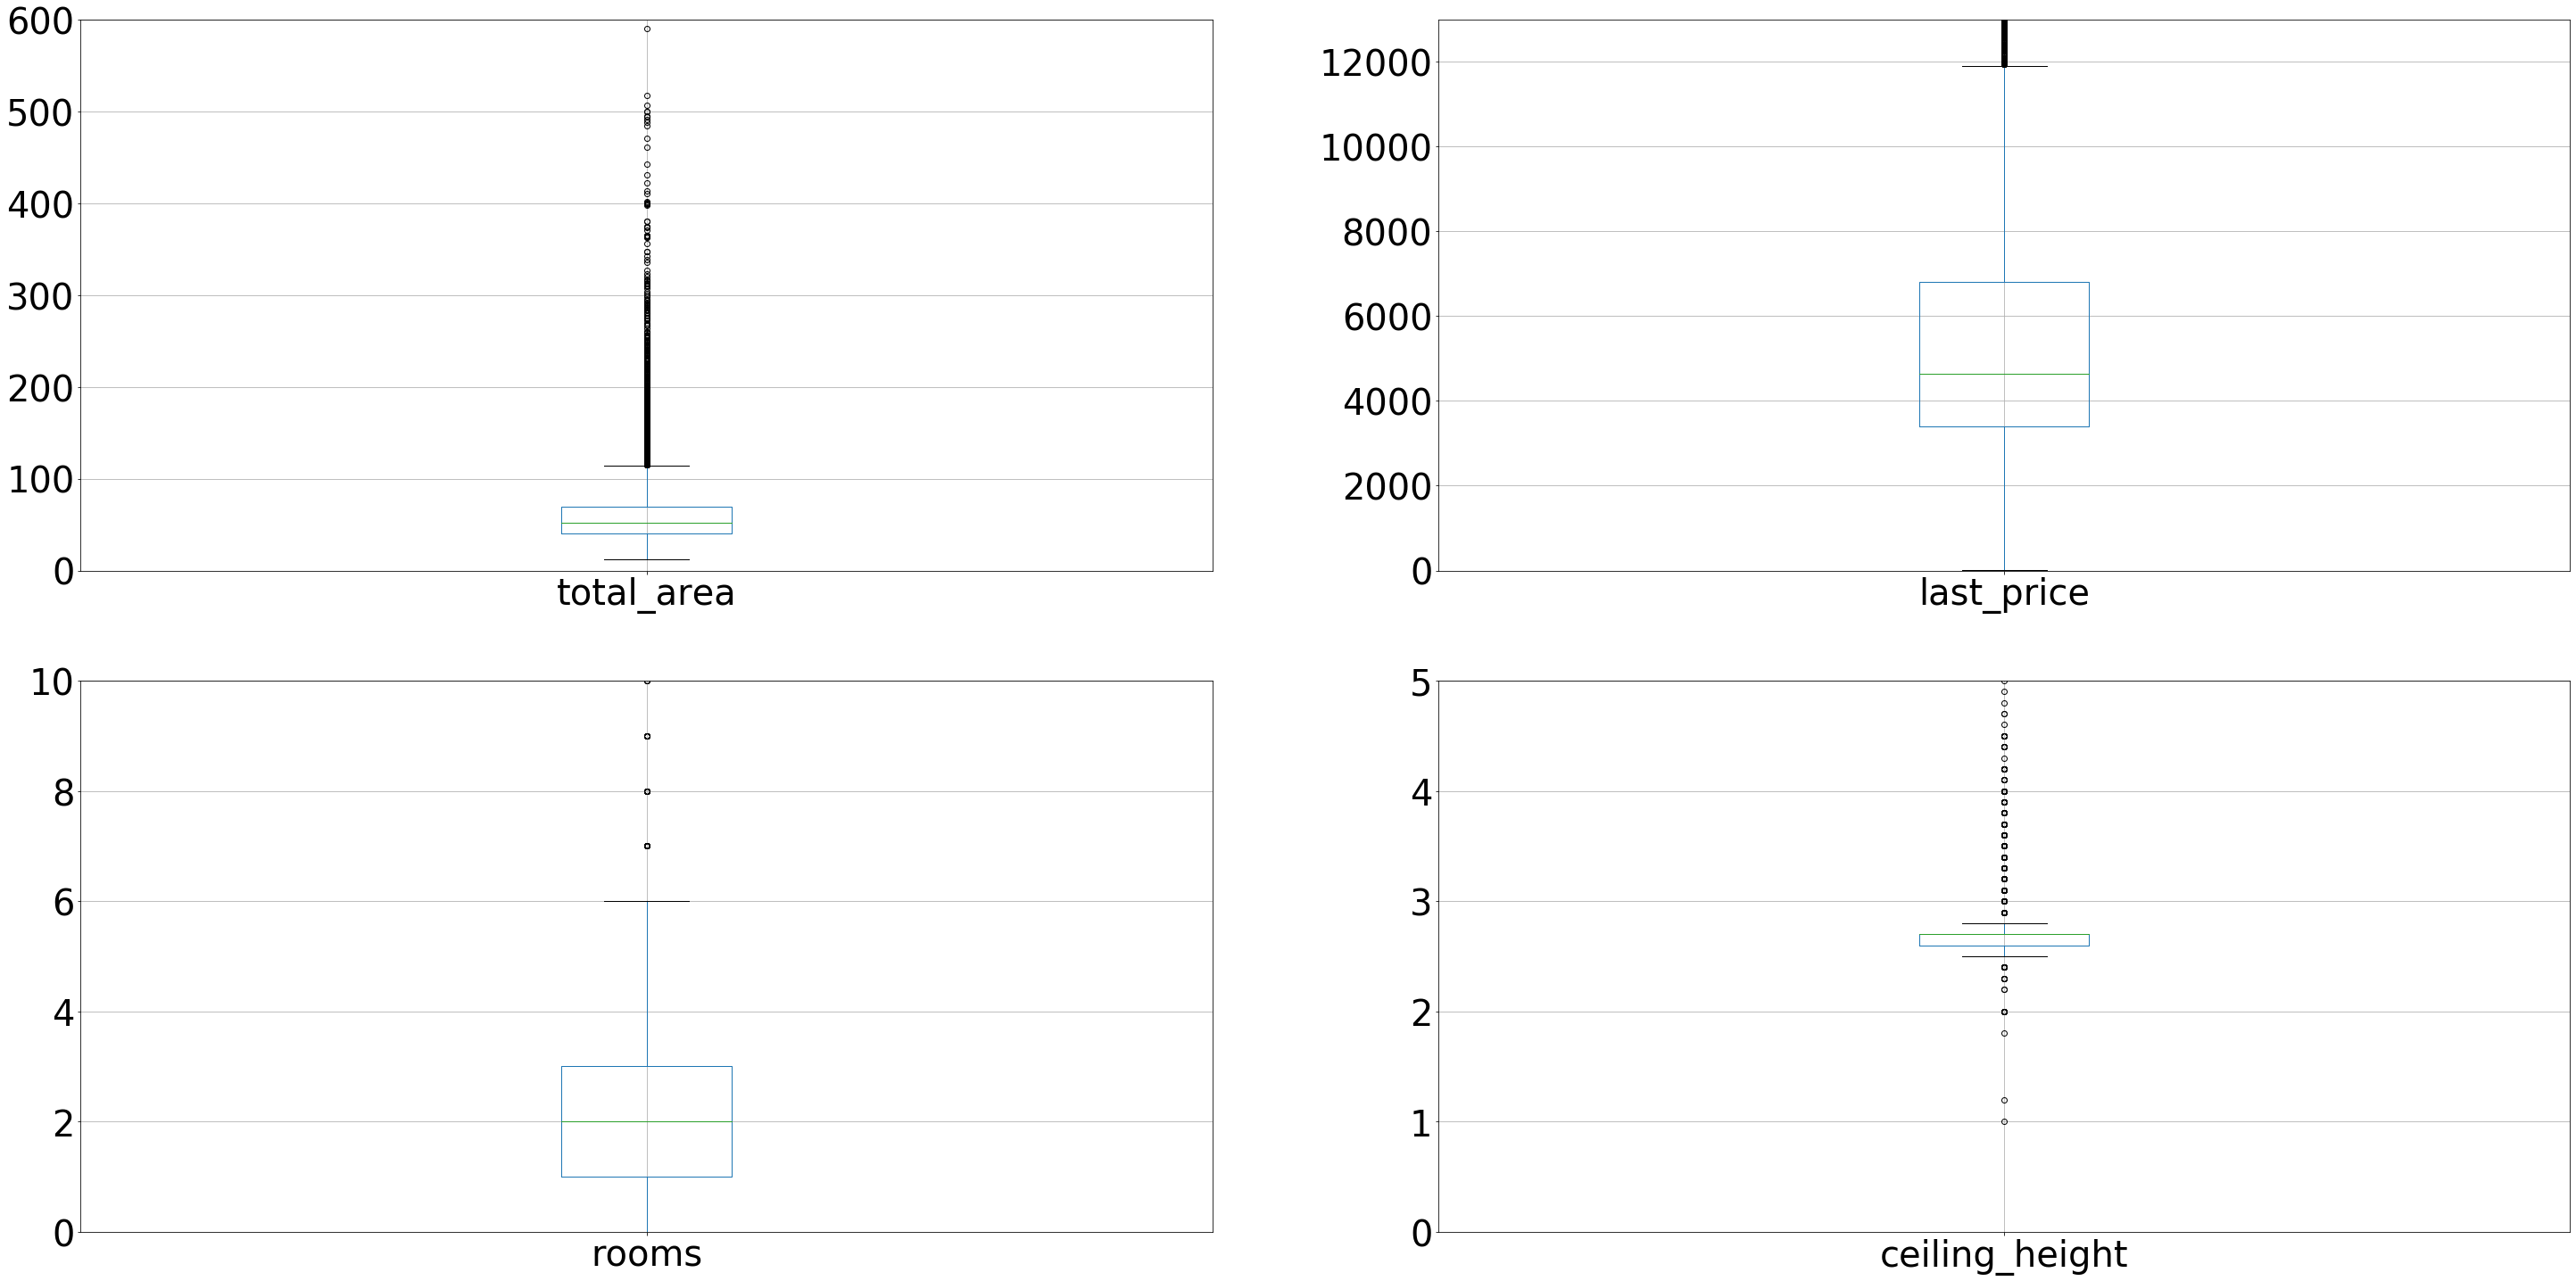

In [76]:
rows = 2
cols = 2
fig, axes = plt.subplots(rows, cols, figsize=(50,25))
column_list = ['total_area', 'last_price', 'rooms', 'ceiling_height']
ylims = [600, 13000, 10, 5]
count = 0
for r in range(rows):
    for c in range(cols):
        ax = df.boxplot(column=column_list[count], ax=axes[r,c], fontsize=40)
        ax.set_ylim([0, ylims[count]])
        count += 1

In [77]:
#df.boxplot(column = 'total_area')
#plt.ylim(0, 600)
#plt.show()

Установим границы выбросов в 20-130 м.

In [78]:
#df.boxplot(column = 'last_price')
#plt.ylim(0, 13000)
#plt.show()

Установим границы выбросов в 0-12 млн. руб.

In [79]:
#df.boxplot(column = 'rooms')
#plt.ylim(0, 10)
#plt.show()

Установим границы выбросов в 0-6 комнат.

In [80]:
#df.boxplot(column = 'ceiling_height')
#plt.ylim(0, 5)
#plt.show()

Установим границы выбросов в 2.5-3 метра.

Строим гистограммы для каждого параметра.

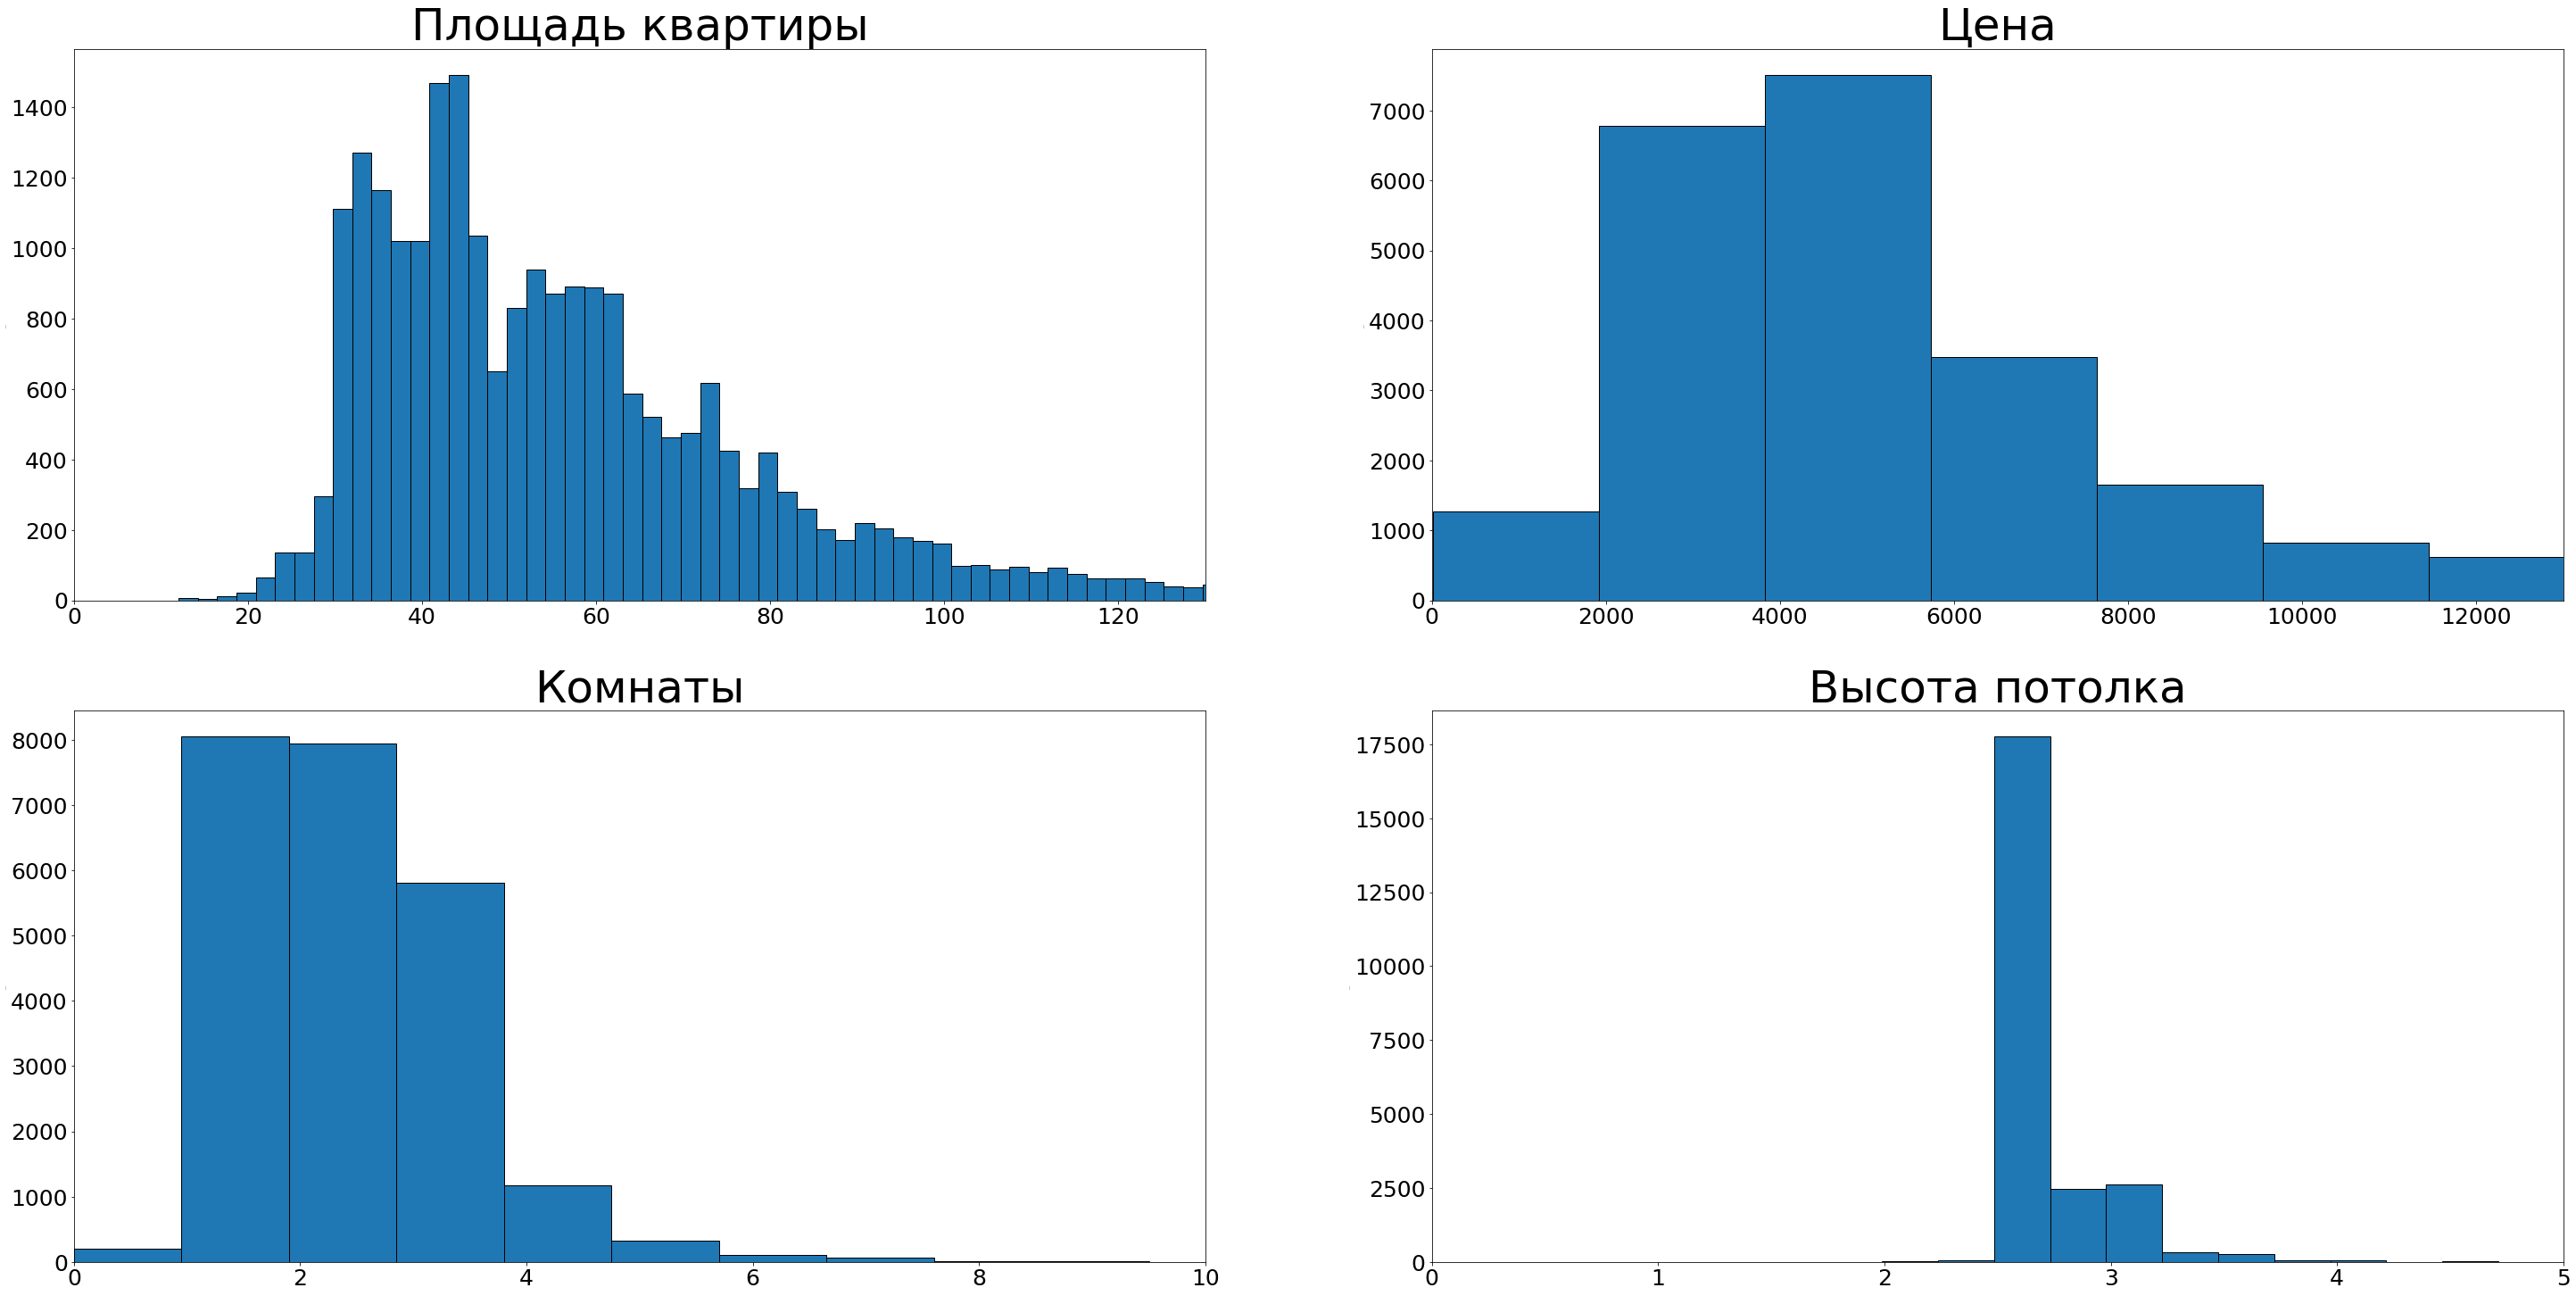

In [81]:
df_list = [df['total_area'], df['last_price'], df['rooms'], df['ceiling_height']]
df_titles_list = ['Площадь квартиры', 'Цена', 'Комнаты', 'Высота потолка']
xlims_list = [130, 13000, 10, 5]
bins_list = [400, 400, 20, 400]
nrow = 2 
ncol = 2

fig, axes = plt.subplots(nrows=nrow, ncols=ncol, figsize=(50,25))

count = 0

for r in range(nrow):
    for c in range(ncol):
            ax = df_list[count].plot(kind = 'hist', bins = bins_list[count], fontsize = 25, title = df_titles_list[count], 
            ec = 'black', ax = axes[r,c])
            ax.set_xlim(0, xlims_list[count])
            ax.title.set_size(50)
            ax.yaxis.label.set_size(0)
            count += 1

In [82]:
#df.hist(column = 'total_area', bins = 100, range = (20,130), ec = 'black')
#plt.xlabel('Площадь квартиры')
#plt.ylabel('Количество')

На основании данных из гистограммы мы можем утверждать, что основная масса проданных квартир имела прлощадь от 30 до 75 квадратных метров. Пик приходится на 45 кв.м.

In [83]:
#df.hist(column = 'last_price', bins = 100, range = (0,13000), ec = 'black')
#plt.xlabel('Цена')
#plt.ylabel('Количество')

Оснавная часть квартир продаётся за 3-6 млн. рублей.

In [84]:
#df.hist(column = 'rooms', bins = 10, range = (0,10), ec = 'black')
#plt.xlabel('Комнаты')
#plt.ylabel('Количество')

Наибольшая часть квартир имеет от 1 до 3 комнат. 4-х комнатные квартиры идут следом. Квартиры с большим количеством комнат в меньшинстве.

In [85]:
#df.hist(column = 'ceiling_height', bins = 20, range = (0,5), ec = 'black')
#plt.xlabel('Высота потолка')
#plt.ylabel('Количество')

Основная масса квартир имеет высоту потолков от 2.5 до 3.2 метров. Пик - 2.7 метра.

<font color=#008000>4.2 Изучение времени продажи квартиры.</font>

Посмотрим внимательно на колонку 'days_exposition'.

In [86]:
df['days_exposition'].describe().to_frame()

,days_exposition
count,20518.000000
mean,180.888634
std,219.727988
min,1.000000
25%,45.000000
50%,95.000000
75%,232.000000
max,1580.000000


In [87]:
df['days_exposition'].median()

95.0

Среднее время продажи квартиры - 180 дней. Медиана - 95 дней. Построим гистограмму.

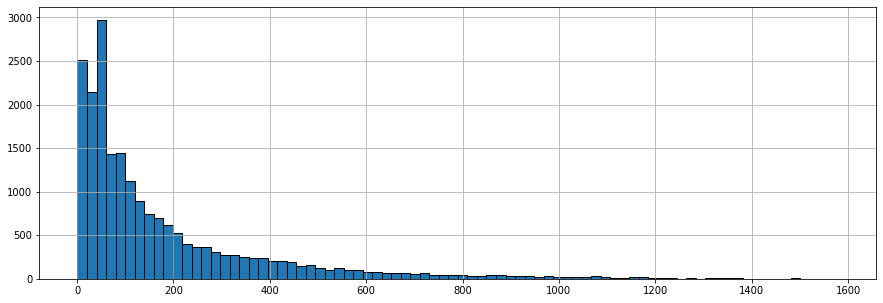

In [88]:
df['days_exposition'].hist(bins = 80, figsize = (15,5), ec = 'black')

Самое распространённое время продажи квартиры - ~60 дней. Квартир с более длительным сроком продажи становится пропорционально меньше. Также есть квартиры, которые продовались более 1400 дней. Возможно, квартиры с очень долгим сроком продажи были проданы намного раньше, но объявления о их продаже не были удалены. Они были закрыты модераторами площадки.

<font color=#008000>4.3 Какие факторы больше всего влияют на стоимость квартиры?</font>

Нам нужно изучить зависимость цены на квартиру от числа комнат, этажа, удалённости от центра, цены квадратного метра, и даты размещения объявления.

Построим диаграмму размаха, определим по нему выбросы, и построим график зависимости цены от числа комнат.

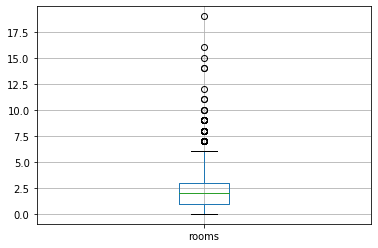

In [89]:
df.boxplot(column = 'rooms')

Выбросы начинаются после 6 комнат.

In [90]:
def depend_price(df, column):
    title_dict = {'rooms': 'Зависимость цены от количества комнат', 'floor_category': 'Зависимость цены от этажа',
                  'distance_from_center_category': 'Зависимость цены от удаленности от центра города',
                  'day':'Медиана цен по дням недели', 'month': 'Медиана цен по месяцам',
                  'year': 'Медиана цен по годам', 
                  'cityCenters_kms': 'Зависимость цены от удаленности от центра города'}
    if column == 'floor_category' or column == 'distance_from_center_category':
        sort_key = 'last_price'
    else:
        sort_key = column
    if column == 'distance_from_center_category':
        fontsize = 12
    else:
        fontsize = 15
    df_filtered = df.groupby(column).median()['last_price'].reset_index().sort_values(by=sort_key)
    plot = df_filtered.plot(x=column, y="last_price", kind='bar', ec='black', 
                            title=title_dict[column], legend=None, 
                            fontsize=fontsize, figsize=(9,4))
    ax2 = plt.gca()
    x_axis = ax2.xaxis
    x_axis.label.set_visible(False)
    if column != 'cityCenters_kms':
        plt.xticks(rotation=0)
    return plot

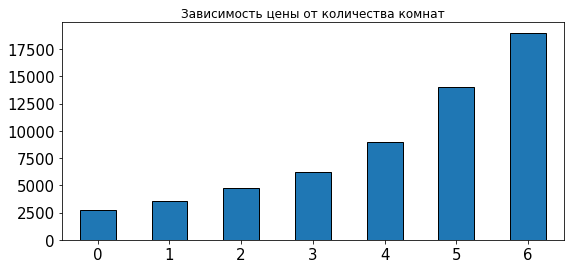

In [91]:
depend_price(df.query('rooms <= 6'), 'rooms')
#df_filtered_rooms = df.query('rooms <= 6').groupby('rooms').median()['last_price'].reset_index().sort_values(by = 'rooms')
#df_filtered_rooms.plot(x = 'rooms', y = 'last_price' , kind = 'bar', ec = 'black', 
#title = 'Зависимость цены от числа комнат', legend = None, 
#fontsize = 15, figsize = (9,4))

Логично, что с увеличением количества комнат цена тоже увеличивается.

Теперь посмотрим на зависимость цены от этажа.

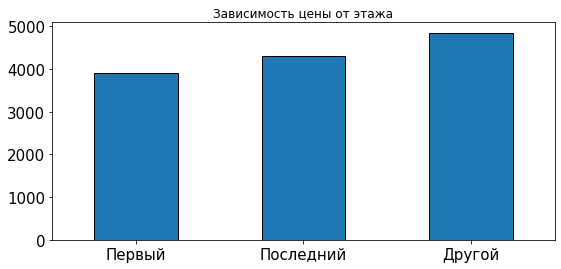

In [92]:
depend_price(df, 'floor_category')
#df_filtered_floor_category = df.groupby('floor_category').median()['last_price'].reset_index().sort_values(by = 'last_price')
#df_filtered_floor_category.plot(x = 'floor_category', y = 'last_price' , kind = 'bar', ec = 'black', 
#title = 'Зависимость цены от этажа', legend = None, 
#fontsize = 15, figsize = (9,4))

Квартиры на первом этажу чуть дешевле квартир на последнем этаже, и примерно на 15% дешевле квартир, расположенных на других этажах.

Теперь посмотрим на зависимость цены от удалённости от центра.

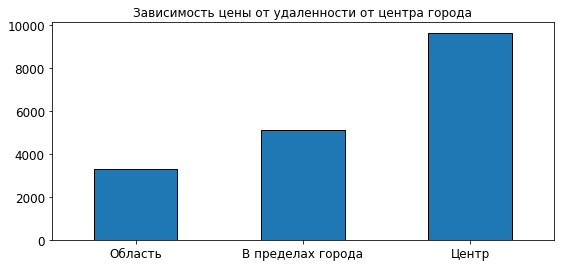

In [93]:
depend_price(df, 'distance_from_center_category')
#df_filtered_distance_from_center_category = df.groupby('distance_from_center_category').median()['last_price'].reset_index().sort_values(by = 'last_price')
#df_filtered_distance_from_center_category.plot(x = 'distance_from_center_category', y = 'last_price' , kind = 'bar', ec = 'black', 
#title = 'Зависимость цены от удалённости от центра', legend = None, 
#fontsize = 13, figsize = (9,4))

В центра расположенны самые дорогие квартиры. Чем дальше от центра, тем дешевле.

Теперь посмотрим на зависимость цены от цены квадратного метра.

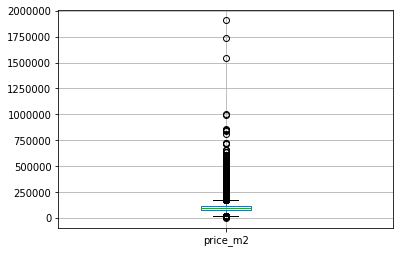

In [94]:
df.boxplot(column = 'price_m2')

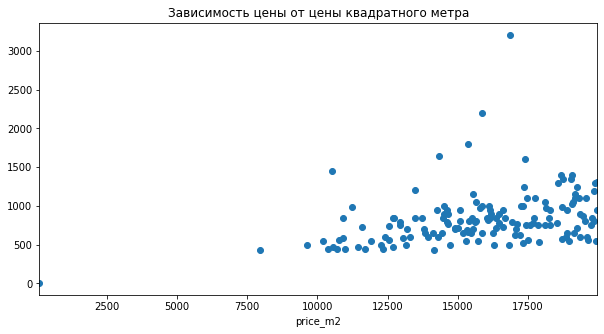

In [95]:
df_filtered_price_m2 = df.query(' 0 < price_m2 < 20000').groupby('price_m2').median()['last_price'].reset_index().sort_values(by = 'last_price')
df_filtered_price_m2.plot(x = 'price_m2', y = 'last_price' , style = 'o', 
title = 'Зависимость цены от цены квадратного метра', legend = None, figsize = (10,5))

Можно заметить, что общая цена увеличивается с увеличением цены за квадратный метр.

Теперь посмотрим на зависимость цены от дня недели размещения объявления.

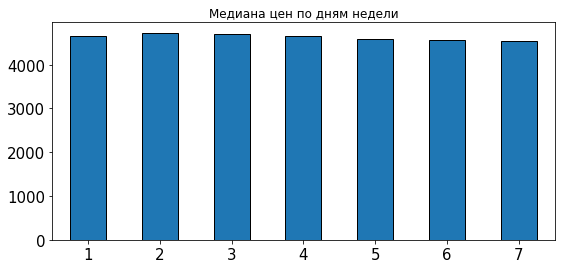

In [96]:
depend_price(df, 'day')
#df_filtered_day = df.groupby('day').median()['last_price'].reset_index().sort_values(by = 'day')
#df_filtered_day.plot(x = 'day', y = 'last_price', kind = 'bar', ylim = (4000, 4900), figsize = (10,5), ec = 'black',
#legend = False, title = 'Зависимость цены от дня размещения', fontsize=15)

Судя по графику, цена на квартиры, размещённые на продажу в будний день, выше, чем на квартиры, чьи объявления были размещены в выходные.

Теперь посмотрим на зависимость цены от месяца размещения объявления.

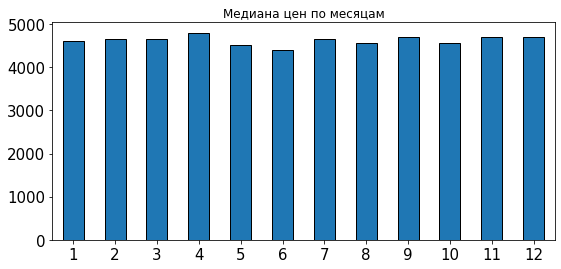

In [97]:
depend_price(df, 'month')
#df_filtered_month = df.groupby('month').median()['last_price'].reset_index().sort_values(by = 'month')
#df_filtered_month.plot(x = 'month', y = 'last_price', kind = 'bar', ylim = (4000, 4900), figsize = (10,5), ec = 'black',
#legend = False, title = 'Зависимость цены от месяца размещения', fontsize=15)

Судя по этому графику, наивысшая цена на квартиры, размещенные на продажу в апреле, а наименьшая цена у квартир, размещенных на продажу в июне.

Теперь посмотрим на зависимость цены от года размещения объявления.

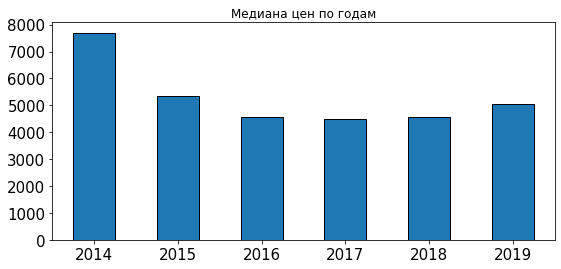

In [98]:
depend_price(df, 'year')
#df_filtered_year = df.groupby('year').median()['last_price'].reset_index().sort_values(by = 'year')
#df_filtered_year.plot(x = 'year', y = 'last_price', kind = 'bar', ylim = (4000, 8000), figsize = (10,5), ec = 'black',
#legend = False, title = 'Зависимость цены от года размещения', fontsize=15)

Самые высокие цены были у квартир, размещённых на продажу в 2014 году. Это можно объяснить высоким спросом, образовавшимся во время стремительного ослабления рубля после определйнных событий в 2014 году. В последующие годы, вместе со снижением покупательносй способности рассиян, снижался спрос и цены на квартиры. В 2019 спрос начал рости, и вместе с ним цены.

<font color=#008000>4.4 10 населённых пунктов с наибольшим числом объявлений.</font>

Найдём 10 населённых пунктов с самым большим числом объявлений. Посчитайм среднюю стоимость жилья в этих населённых пунктах. Выделим населённый пункт с самой высокой ценой, и самой низкой.

Начнём с 10ти населённых пунктов.

In [99]:
cities = df.pivot_table(index = 'locality_name', values = 'price_m2', 
aggfunc = ['count', 'median']).sort_values(by = ('count', 'price_m2'), ascending = False)
cities.set_axis(['Количество объявлений', 'Цена за квадратный метр'], axis = 'columns', inplace = True)
cities.head(10)

,Количество объявлений,Цена за квадратный метр
locality_name,,
Санкт-Петербург,15721,104761.0
посёлок Мурино,522,85890.0
посёлок Шушары,440,76876.0
Всеволожск,398,65789.0
Пушкин,369,100000.0
Колпино,338,74723.5
посёлок Парголово,327,91642.0
Гатчина,307,67796.0
деревня Кудрово,299,91860.0


Самая высокая стоимость за квадратный метр, как и ожидалось, в Санкт-Петербурге. Самая низкая цена в Выборге: в два раза от стоимости в Санкт-Петербурге.

<font color=#008000>4.5 Предложения квартир в Санкт-Петербурге.</font>

Нам нужно изучить зависимость цены квартир в Санкт-Петербурге от расстояния до центра города.

Отфильтурем таблицу, и получим объявлекния для квартир в Санкт-Петербурге. Далее мы добавим столбец с расстоянием квартир до центра города, и рассчитаем среднюю цену для каждого километра. В конце мы построим график зависимости цены от расстояния до центра.

In [100]:
df_filtered_saint_petersburg = df.query('locality_name == "Санкт-Петербург"')
df_filtered_saint_petersburg.loc[:, 'cityCenters_kms'] = (df_filtered_saint_petersburg.loc[:, 'cityCenters_nearest']/1000).round()
df_filtered_saint_petersburg.head()

/opt/conda/lib/python3.7/site-packages/pandas/core/indexing.py:376: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/opt/conda/lib/python3.7/site-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,days_exposition,distance_from_center_category,price_m2,day,month,year,floor_category,living_area_ratio,kitchen_area_ratio,cityCenters_kms
0,20,13000,108.0,2019-03-07,3,2.7,16.0,51.0,8,NaN,...,NaN,В пределах города,120370,4,3,2019,Другой,0.47,0.23,16.0
2,10,5196,56.0,2015-08-20,2,2.7,5.0,34.3,4,NaN,...,558.0,В пределах города,92785,4,8,2015,Другой,0.61,0.15,14.0
3,0,64900,159.0,2015-07-24,3,2.7,14.0,NaN,9,NaN,...,424.0,В пределах города,408176,5,7,2015,Другой,NaN,NaN,7.0
4,2,10000,100.0,2018-06-19,2,3.0,14.0,32.0,13,NaN,...,121.0,В пределах города,100000,2,6,2018,Другой,0.32,0.41,8.0
7,5,7915,71.6,2019-04-18,2,2.7,24.0,NaN,22,NaN,...,NaN,В пределах города,110544,4,4,2019,Другой,NaN,0.26,12.0


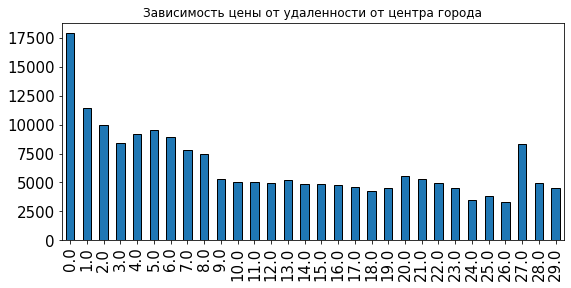

In [101]:
df_filtered_saint_petersburg_median = df_filtered_saint_petersburg.groupby('cityCenters_kms').median()['last_price'].reset_index().sort_values(by = 'cityCenters_kms')
depend_price(df_filtered_saint_petersburg_median, 'cityCenters_kms')
#df_filtered_saint_petersburg_median.plot(x = 'cityCenters_kms', y = 'last_price' , kind = 'bar', ec = 'black', 
#title = 'Зависимость цены от удалённости от центра', legend = None, 
#fontsize = 15, figsize = (15,7))

Самые дорогие квартиры расположены в центре Санкт-Петербурга. Там стоимость квартиры превышает 17.5 млн. Чем дальше от центра, тем стремительнее падает цента: уже в 1 климетре от центра стоимость ниже на 35%. В диапазоне от 9 до 19 км. от центра стоимость колеблется в районе 5 млн. Центральный район можно ограничить 3 км.

<font color=#008000>4.6 Сегмент квартир в центре Санкт-Петербурга.</font>

Нам нужно выделить и проанализировать следующие параметры квартир, расположенных в центре: площадь, цена, число комнат, высота потолков. Также выделите факторы, которые влияют на стоимость квартиры (число комнат, этаж, удалённость от центра, дата размещения объявления).

In [102]:
df_filtered_saint_petersburg_center = df_filtered_saint_petersburg.query('cityCenters_nearest <= 3000')
df_filtered_saint_petersburg_center.shape[0]

633

В ценральном районе расположено 633 квартирs. Построим гистограммы для следующих параметров: площадь, цена, число комнат, высота потолков.

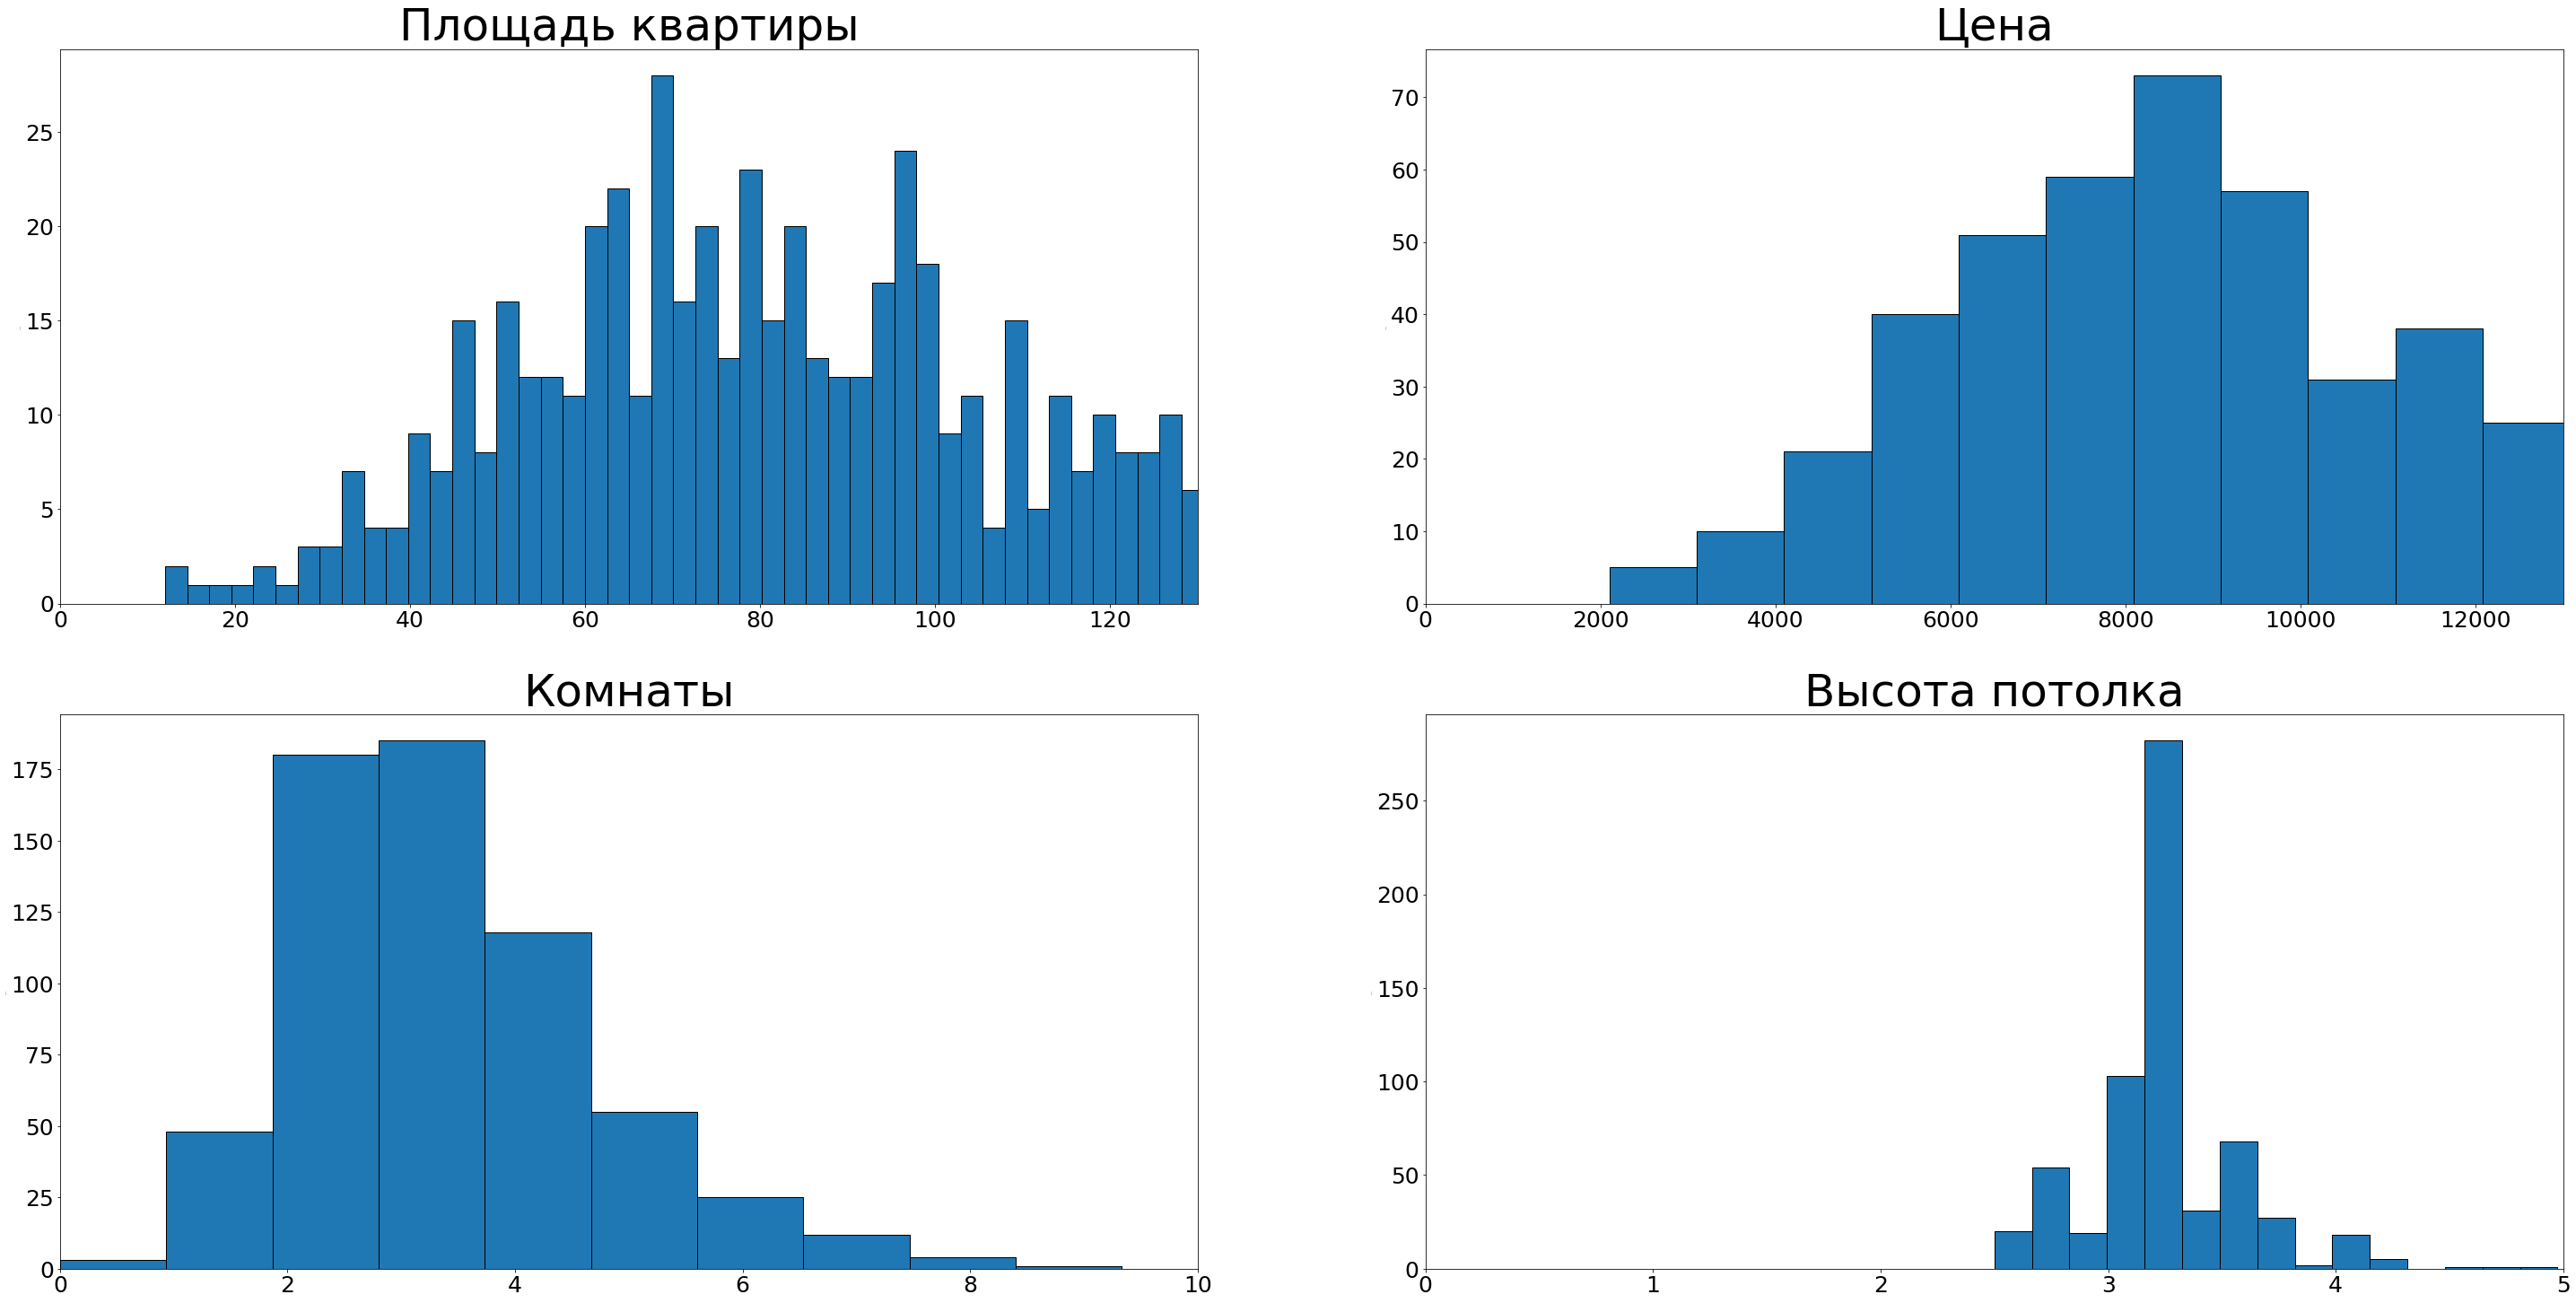

In [103]:
df_list = [df_filtered_saint_petersburg_center['total_area'], df_filtered_saint_petersburg_center['last_price'], df_filtered_saint_petersburg_center['rooms'], df_filtered_saint_petersburg_center['ceiling_height']]
df_titles_list = ['Площадь квартиры', 'Цена', 'Комнаты', 'Высота потолка']
xlims_list = [130, 13000, 10, 5]
bins_list = [200, 400, 15, 20]
nrow = 2 
ncol = 2

fig, axes = plt.subplots(nrows=nrow, ncols=ncol, figsize=(50,25))

count = 0

for r in range(nrow):
    for c in range(ncol):
            ax = df_list[count].plot(kind = 'hist', bins = bins_list[count], fontsize = 25, title = df_titles_list[count], 
            ec = 'black', ax = axes[r,c])
            ax.set_xlim(0, xlims_list[count])
            ax.title.set_size(50)
            ax.yaxis.label.set_size(0)
            count += 1

In [104]:
#df_filtered_saint_petersburg_center.hist(column = 'total_area', bins = 50, range = (20,130))

Основная масса квартир имеет площадь 40-100 кв. метров. Есть пики на на значении 45м, 60м, 70м.

In [105]:
#df_filtered_saint_petersburg_center.hist(column = 'last_price', bins = 10, range = (0,13000))

Основной массив квартир в центре был продан за 5-10 млн. рублей.

In [106]:
#df_filtered_saint_petersburg_center.hist(column = 'rooms', bins = 10, range = (0,10))

Основной массив квартир в центре имеет 1-4 комнаты..

In [107]:
#df_filtered_saint_petersburg_center.hist(column = 'ceiling_height', bins = 30, range = (0, 5))

У большинства квартир в центре высота потолка равна 3м и 3.25м.

Теперь посчитаем зависимость цены от следующих факторов: число комнат, этаж, удалённость от центра, дата размещения объявления.

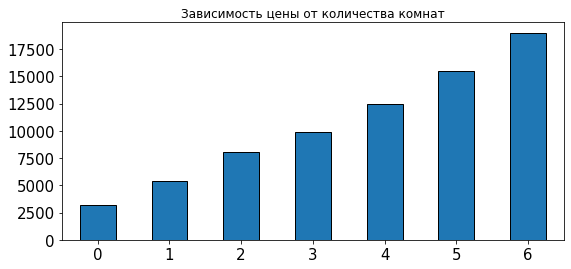

In [108]:
depend_price(df_filtered_saint_petersburg_center.query('rooms <= 6'), 'rooms')
#df_filtered_saint_petersburg_center_rooms = df_filtered_saint_petersburg_center.query('rooms <= 6').groupby('rooms').median()['last_price'].reset_index().sort_values(by = 'rooms')
#df_filtered_saint_petersburg_center_rooms.plot(x = 'rooms', y = 'last_price' , kind = 'bar', ec = 'black', 
#title = 'Зависимость цены квартир в центре от числа комнат', legend = None, 
#fontsize = 15, figsize = (9,4))

Зависимость такая же, как и всех квартир в целом: чем больше комнат, тем выше цена.

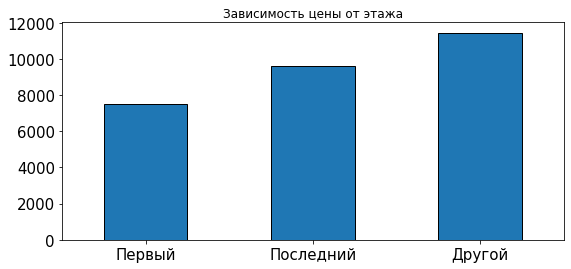

In [109]:
depend_price(df_filtered_saint_petersburg_center, 'floor_category')
#df_filtered_saint_petersburg_center_floor_category = df_filtered_saint_petersburg_center.groupby('floor_category').median()['last_price'].reset_index().sort_values(by = 'last_price')
#df_filtered_saint_petersburg_center_floor_category.plot(x = 'floor_category', y = 'last_price' , kind = 'bar', ec = 'black', 
#title = 'Зависимость цены квартиры в центре от этажа', legend = None, 
#fontsize = 15, figsize = (9,4))

Самая низкая цена у первого этажа. У последнего цена чуть выше. У других этажей цена самая высокая.

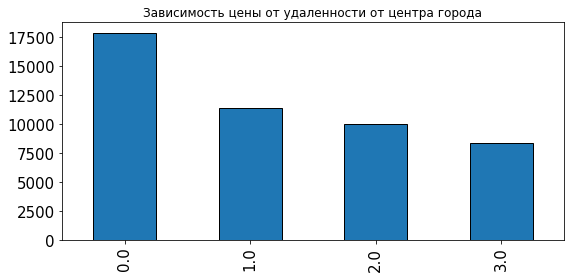

In [110]:
depend_price(df_filtered_saint_petersburg_center, 'cityCenters_kms')
#df_filtered_saint_petersburg_center_distance = df_filtered_saint_petersburg_center.groupby('cityCenters_kms').median()['last_price'].reset_index().sort_values(by = 'cityCenters_kms')
#df_filtered_saint_petersburg_center_distance.plot(x = 'cityCenters_kms', y = 'last_price' , kind = 'bar', ec = 'black', 
#title = 'Зависимость цены квартиры в центре от удалённости', legend = None, 
#fontsize = 13, figsize = (9,4))

Квартиры в самом центре на 30% дороже, чем квартиры на небольшом удалении от центра. В общем в центре Санкт-Петербурга стоимость квартиры колеблась между 7.7 млн. и 17.5 млн.

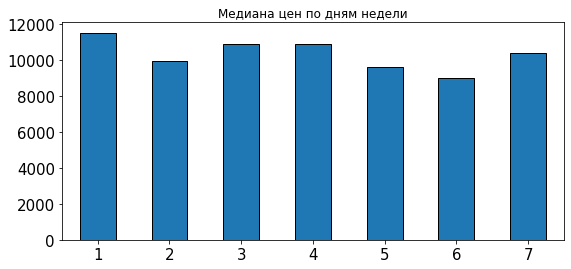

In [111]:
depend_price(df_filtered_saint_petersburg_center, 'day')
#df_filtered_saint_petersburg_center_day = df_filtered_saint_petersburg_center.groupby('day').median()['last_price'].reset_index().sort_values(by = 'day')
#df_filtered_saint_petersburg_center_day.plot(x = 'day', y = 'last_price', kind = 'bar', ylim = (5000, 12000), figsize = (10,5), ec = 'black',
#legend = False, title = 'Зависимость цены квартиры в центре от дня размещения', fontsize=15)

У квартир размещённых в понедельник, среду, четверг и воскресенье самые высокие цены. А в субботу - самые низкие.

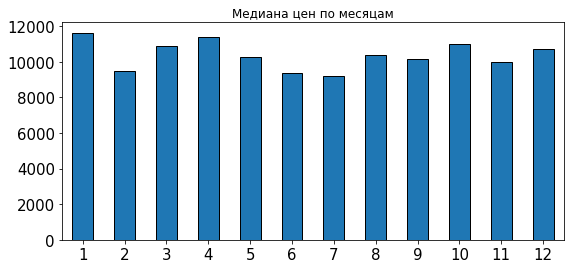

In [112]:
depend_price(df_filtered_saint_petersburg_center, 'month')
#df_filtered_saint_petersburg_center_month = df_filtered_saint_petersburg_center.groupby('month').median()['last_price'].reset_index().sort_values(by = 'month')
#df_filtered_saint_petersburg_center_month.plot(x = 'month', y = 'last_price', kind = 'bar', ylim = (5000, 12000), figsize = (10,5), ec = 'black',
#legend = False, title = 'Зависимость цены квартиры в центре от месяца размещения', fontsize=15)

Январь, апрель, октябрь и декабрь - самые высокие цены. Февраль, июнь и июль - самые низкие.

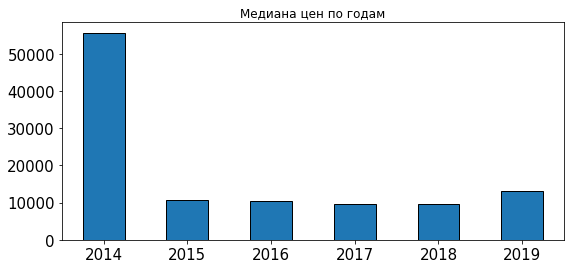

In [113]:
depend_price(df_filtered_saint_petersburg_center, 'year')
#df_filtered_saint_petersburg_center_year = df_filtered_saint_petersburg_center.groupby('year').median()['last_price'].reset_index().sort_values(by = 'year')
#df_filtered_saint_petersburg_center_year.plot(x = 'year', y = 'last_price', kind = 'bar', ylim = (7000, 22000), figsize = (10,5), ec = 'black',
#legend = False, title = 'Зависимость цены квартиры в центре от года размещения', fontsize=15)

Зависимость цены квартир в центре Санкт-Петербурга очень похожа на общую картину по всем квартирам: в 2014 году цена была запредельно высокой, а в последующие годы резко упала. Только в 2019 году она начала потихоньку расти.

Вывод:

- площадь - большинство квартир в центре имеют площадь 40-100кв.м. Значение для всего города 35-75кв.м
- цена - центр 7-10 млн. руб. Общий - 3-6 млн. руб.
- число комнат - центр 2-4 комнаты. Общий - 1-3 комнаты.
- высота потолка - центр 2.7-3.2м. Общий - 2.5 - 3.2м.

Зависимость цены (от числа комнат, этажа, удалённости от центра и дата размещения объявления) очень похожа на общие данные:
- комнаты - чем больше комнат, тем выше цена
- этаж - квартиры на первом этаже значительнее дешевле квартипр на других этажах
- удалённость от центра - чем дальше от центра, тем ниже цена
- день - квартиры выставленные на продажу в субботу незначительнее дешевле
- месяц - квартиры в центре, выставленные на продажу в начале года, продавались по более высокой цене, чем квартиры, выставленные в конце года. По общим данным мы имеем противоположный результат: в начале года цена чуть ниже, чем в конце.
- год - в 2014 цены на квартиры, из центра и области, были наиболее высокими. В последующие годы цена падала, и только в 2019 начала расти.

### Шаг 5. Общий вывод

Мы получили данные сервиса Яндекс.Недвижимость. После их изучения мы обнаружили пропуски в колонках:
- ceiling_height
- floors_total
- living_area/kitchen_area
- is_apartment
- balcony
- locality_name
- parks_around3000, parks_nearest, ponds_around3000, ponds_nearest
- airports_nearest, cityCenters_nearest
- days_exposition

Было решено заполнить пропуски в колонках ceiling_height, floors_total, balcony, airports_nearest, cityCenters_nearest.

Далее были изменены типы данных на int колонок:
- last_price
- balcony

А эти колонки были округлены до 0.1:

- total_area
- ceiling_height
- living_area
- kitchen_area

Колонка first_day_exposition была переведена в datetime.

Также в таблицу были добавлены следующие колонки:
- цена квадратного метра
- день недели публикации объявления
- месяц убликации объявления
- год публикации объявления
- этаж квартиры (первый, последний, другой)
- соотношение жилой и общей площади
- отношение площади кухни к общей площади

Был проведен исследовательский анализ данных:
- площадь - чем выше площадь, тем выше стоимость квартиры
- комнаты - чем больше комнат, тем выше стоимость квартиры
- удалённость от центра - чем дальше от центра, тем ниже стоимость квартиры
- этажи - стоимость квартир на 1 этаже ниже, чем у квартир на других этажах
- день недели размещения объявления - квартиры, размещённые на продажу в выходные дни, чуть дешевле, чем у квартир, размещённых в будний день.
- месяц размещения - квартиры в центре, выставленные на продажу в начале года, продавались по более высокой цене, чем квартиры, выставленные в конце года. По общим данным мы имеем противоположный результат: в начале года цена чуть ниже, чем в конце.
- год размещения - цены на квартиры, из центра и области, были наиболее высокими. В последующие годы цена падала, и только в 2019 начала расти.
- населённый пункт с самой высокой стоимостью жилься - Санкт-Петербург
- населенный пункт с самой низкой стоимостью жилья - Выборг

### Чек-лист готовности проекта

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  открыт файл
- [x]  файлы изучены (выведены первые строки, метод info())
- [x]  определены пропущенные значения
- [x]  заполнены пропущенные значения
- [x]  есть пояснение какие пропущенные значения обнаружены
- [x]  изменены типы данных
- [x]  есть пояснение в каких столбцах изменены типы и почему
- [x]  посчитано и добавлено в таблицу: цена квадратного метра
- [x]  посчитано и добавлено в таблицу: день недели, месяц и год публикации объявления
- [x]  посчитано и добавлено в таблицу: этаж квартиры; варианты — первый, последний, другой
- [x]  посчитано и добавлено в таблицу: соотношение жилой и общей площади, а также отношение площади кухни к общей
- [x]  изучены следующие параметры: площадь, цена, число комнат, высота потолков
- [x]  построены гистограммы для каждого параметра
- [x]  выполнено задание: "Изучите время продажи квартиры. Постройте гистограмму. Посчитайте среднее и медиану. Опишите, сколько обычно занимает продажа. Когда можно считать, что продажи прошли очень быстро, а когда необычно долго?"
- [x]  выполнено задание: "Уберите редкие и выбивающиеся значения. Опишите, какие особенности обнаружили."
- [x]  выполнено задание: "Какие факторы больше всего влияют на стоимость квартиры? Изучите, зависит ли цена от квадратного метра, числа комнат, этажа (первого или последнего), удалённости от центра. Также изучите зависимость от даты размещения: дня недели, месяца и года. "Выберите 10 населённых пунктов с наибольшим числом объявлений. Посчитайте среднюю цену квадратного метра в этих населённых пунктах. Выделите населённые пункты с самой высокой и низкой стоимостью жилья. Эти данные можно найти по имени в столбце '*locality_name'*. "
- [x]  выполнено задание: "Изучите предложения квартир: для каждой квартиры есть информация о расстоянии до центра. Выделите квартиры в Санкт-Петербурге (*'locality_name'*). Ваша задача — выяснить, какая область входит в центр. Создайте столбец с расстоянием до центра в километрах: округлите до целых значений. После этого посчитайте среднюю цену для каждого километра. Постройте график: он должен показывать, как цена зависит от удалённости от центра. Определите границу, где график сильно меняется — это и будет центральная зона. "
- [x]  выполнено задание: "Выделите сегмент квартир в центре. Проанализируйте эту территорию и изучите следующие параметры: площадь, цена, число комнат, высота потолков. Также выделите факторы, которые влияют на стоимость квартиры (число комнат, этаж, удалённость от центра, дата размещения объявления). Сделайте выводы. Отличаются ли они от общих выводов по всему городу?"
- [x]  в каждом этапе есть выводы
- [x]  есть общий вывод